レンタル自転車屋さんの天候による売り上げ予測

In [3]:
#共通前処理

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import japanize_matplotlib

#データフレーム表示用関数
from IPython.display import display

#表示オプションの調整
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format

#データフレームですべての項目を表示する
pd.set_option('display.max_columns', None)

#グラフのフォント設定
plt.rcParams['font.size'] = 14

#乱数
random_seed = 123


ダウンロードをしてきたBike-Sharing-Datasetからcsvファイルを  
データフレームへ取り込む

In [6]:
#データの取り込み
#日付の列はperse_datesで指定して、date型に直して取り込む
df = pd.read_csv(r'C:\Users\shoni\Downloads\Bike-Sharing-Dataset\day.csv', parse_dates=[1])

print(df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [7]:
#投入したデータフレームの加工

#0列目のinstartはいらないので削除する
df = df.drop('instant', axis=1)

#項目名の日本語化
columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

#項目名を日本語化に置換する
df.columns = columns

In [8]:
display(df)

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796


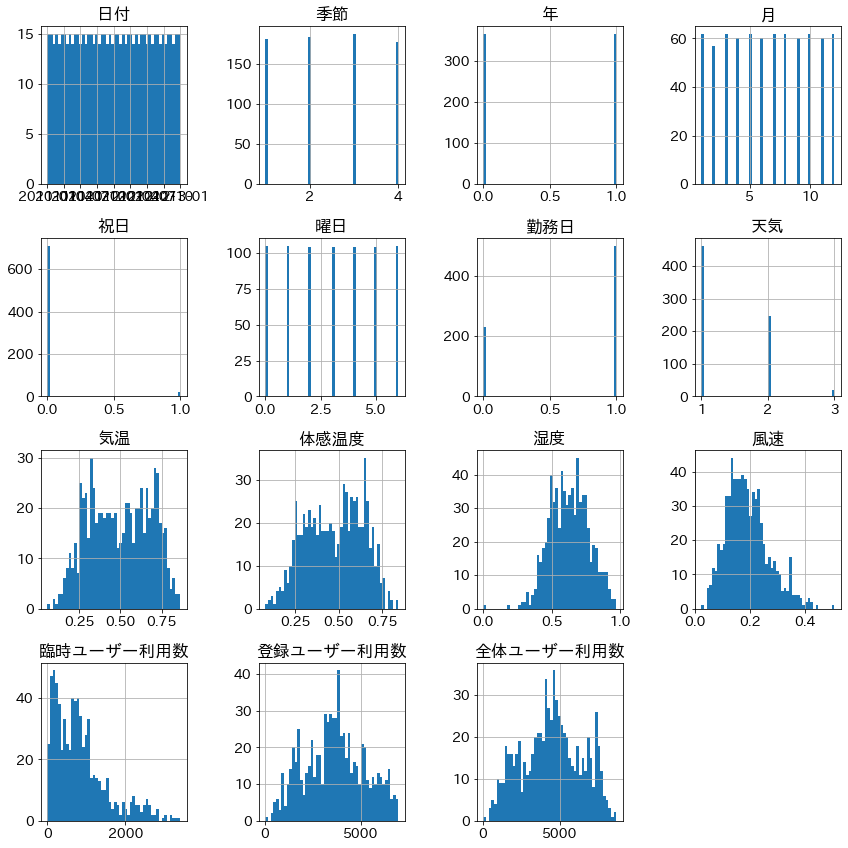

In [13]:
#項目ごとの度数分布を表示する

#グラフ調整
from pylab import rcParams
rcParams['figure.figsize'] = (12,12)

#データフレームの数値項目でヒストグラムを表示する
df.hist(bins=50)
plt.tight_layout()
plt.show()

In [14]:
#欠損値の確認
df.isnull().sum()

日付           0
季節           0
年            0
月            0
祝日           0
曜日           0
勤務日          0
天気           0
気温           0
体感温度         0
湿度           0
風速           0
臨時ユーザー利用数    0
登録ユーザー利用数    0
全体ユーザー利用数    0
dtype: int64

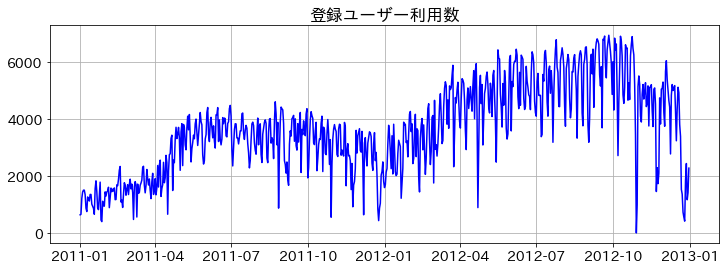

In [15]:
#時系列データをグラフ表示する
#目的変数は登録ユーザー利用数
plt.figure(figsize=(12,4))

#グラフを描画する
plt.plot(df['日付'], df['登録ユーザー利用数'], c='b')


#方眼の表示
plt.grid()
plt.title('登録ユーザー利用数')

plt.show()


対象データ確認は完了したので  
データの前処理とデータの分割を実施する  
特に欠損値はなかったのでデータの分割だけで問題なし

In [16]:
#入力データと正解データの分割

#入力データ(説明変数)
x = df.drop(['日付','臨時ユーザー利用数','登録ユーザー利用数','全体ユーザー利用数'],axis=1)

#目的変数
y = df['登録ユーザー利用数'].values

In [17]:
#2012年11月1日を区切り位置として
#その日の前後で訓練データと検証データに分割する

#分割日を変数へ入れる。to_datetime型で変数に入れている部分がポイント
mday = pd.to_datetime('2012-11-1')

#訓練用indexと検証用indexを作成する2012-11-1以降以前で分けるため
train_index = df['日付'] < mday
test_index = df['日付'] >= mday

#入力データの分割
x_train = x[train_index]
x_test = x[test_index]

y_train = y[train_index]
y_test = y[test_index]

#日付データの分割(グラフ表示用)
dates_test = df['日付'][test_index]


In [19]:
#上で分割した結果を確認する

print(x_train.shape)
print(x_test.shape)

display(x_train.tail())
display(x_test.head())

(670, 11)
(61, 11)


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
665,4,1,10,0,6,0,2,0.5300,0.5151,0.7200,0.2357
666,4,1,10,0,0,0,2,0.4775,0.4678,0.6946,0.3980
667,4,1,10,0,1,1,3,0.4400,0.4394,0.8800,0.3582
668,4,1,10,0,2,1,2,0.3182,0.3099,0.8255,0.2130
669,4,1,10,0,3,1,2,0.3575,0.3611,0.6667,0.1667


,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速
670,4,1,11,0,4,1,2,0.3658,0.3699,0.5817,0.1573
671,4,1,11,0,5,1,1,0.3550,0.3560,0.5221,0.2662
672,4,1,11,0,6,0,2,0.3433,0.3238,0.4913,0.2705
673,4,1,11,0,0,0,1,0.3258,0.3295,0.5329,0.1791
674,4,1,11,0,1,1,1,0.3192,0.3081,0.4942,0.2363


In [23]:
#目的変数の分割結果
print(y_train[:10])

[ 654  670 1229 1454 1518 1518 1362  891  768 1280]


以下よりアルゴリズムの選択から学習、予測を実施する

In [24]:
#アルゴリズムの指定
#XGBRegressorを指定する
#objectiveは損失関数の指定
from xgboost import XGBRegressor
algorithm = XGBRegressor(objective = 'reg:squarederror', random_state=random_seed)

In [28]:
#学習と予測

#登録ユーザ利用数予測モデルの学習と予測

#学習
algorithm.fit(x_train,y_train)

#予測
y_pred = algorithm.predict(x_test)

#予測結果
print(y_pred[:10])


[4927.806  4889.2686 3571.434  3637.8308 4719.999  4611.587  4357.782
 4832.526  5025.0405 4819.9106]


予測までが完了したので評価

In [29]:
#評価方法はいくつかある
#指標値による方法、散布図による方法、時系列による方法

#指標値による方法
#score関数の呼び出し
score = algorithm.score(x_test, y_test)

#R2値の計算
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)

#結果確認
print(f'socre: {score:.4f} r2_score: {r2_score:.4f}')

#結果は同じ値が出てくるはず。つまりscore関数はR2の値を使っていることになる

socre: 0.4206 r2_score: 0.4206


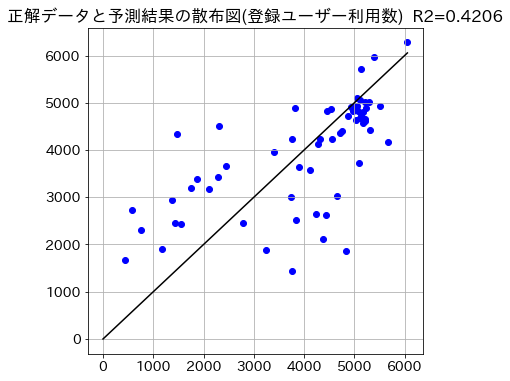

In [32]:
#正解データと予測結果を散布図で比較する

plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数)  R2={score:.4f}')
plt.grid()
plt.show()

#散布図の表示結果は何とも言えないがある程度は比例関係にありそう

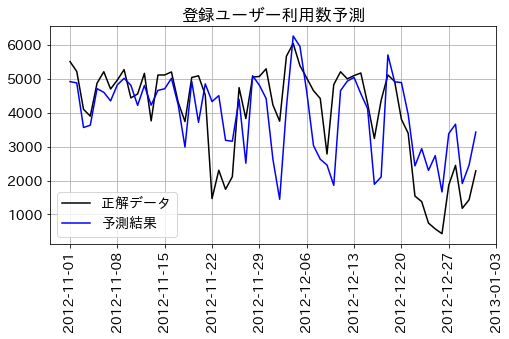

In [36]:
#時系列グラフによる評価
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,4))

#グラフの描画
ax.plot(dates_test, y_test, label='正解データ', c='k')
ax.plot(dates_test, y_pred, label='予測結果', c='b')

#日付目盛間隔
#木曜日ごとに日付を表示する
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付表記を90度回転させる
ax.tick_params(axis='x', rotation=90)

#方眼表示
ax.grid()

#凡例の表示
ax.legend()

#タイトル
ax.set_title('登録ユーザー利用数予測')

plt.show()

#結果を確認するとぴったりと一致しているわけではないが、大体予測できていそうですね

以下より作成したモデルをチューニングして制度を向上させていく

In [38]:
#チューニングを行う

#季節と月に対してone hot エンコーディングを実施する

#one hot エンコーディングを実施するための関数を定義する
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column], axis=1),df_dummy],axis=1)
    return df

#項目の月と季節に対してone hot エンコーディングを実施する

x2 = x.copy()
x2 = enc(x2, '月')
x2 = enc(x2, '季節')

#結果
display(x2.head())

,年,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12,季節_1,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.3442,0.3636,0.8058,0.1604,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,2,0.3635,0.3537,0.6961,0.2485,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,1,0.1964,0.1894,0.4373,0.2483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,2,1,1,0.2000,0.2121,0.5904,0.1603,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,3,1,1,0.2270,0.2293,0.4370,0.1869,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
#再実装

#入力データの分割
x2_train = x2[train_index]
x2_test = x2[test_index]

#アルゴリズムの指定
algorithm2 = XGBRegressor(objective ='reg:squarederror', random_state=random_seed)

#学習
algorithm2.fit(x2_train, y_train)

#予測
y_pred2 = algorithm2.predict(x2_test)

#予測結果
print(y_pred2[:5])


[4654.571  4324.7354 3174.4817 3028.7585 4276.959 ]


In [40]:
#チューニング後の評価

score2 = algorithm2.score(x2_test, y_test)

print(f'score: {score2:.4f}')

score: 0.5099


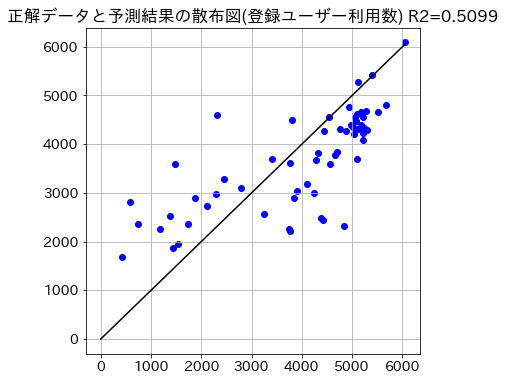

In [41]:
#散布図で比較
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred2, c='b')
plt.title(f'正解データと予測結果の散布図(登録ユーザー利用数) R2={score2:.4f}')
plt.grid()
plt.show()

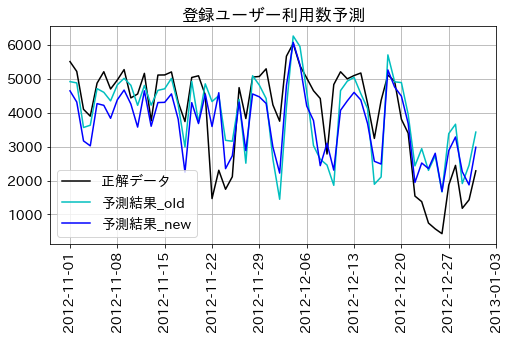

In [44]:
#時系列グラフで比較(チューニング後)
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

#グラフの描画
ax.plot(dates_test, y_test, label='正解データ' , c='k')
ax.plot(dates_test, y_pred, label='予測結果_old' , c='c')
ax.plot(dates_test, y_pred2, label='予測結果_new' , c='b')

#日付のメモリ調整
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#日付書式
ax.tick_params(axis='x', rotation=90)

#方眼表示
#方眼表示
ax.grid()

#凡例の表示
ax.legend()

#タイトル
ax.set_title('登録ユーザー利用数予測')

plt.show()
#多少は精度が上がったとみていいかもしれない


以下かから重要度分析

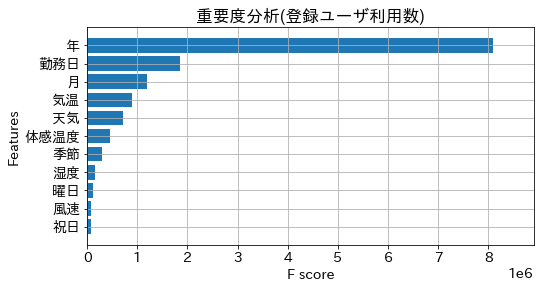

In [45]:
#登録ユーザー利用数に対する重要度分析
import xgboost as xgb
fig, ax = plt.subplots(figsize=(8,4))
xgb.plot_importance(algorithm, ax=ax, height=0.8, importance_type='gain', show_values=False,
                   title='重要度分析(登録ユーザ利用数)')
plt.show()